In [11]:
import pandas as pd
import numpy as np

import geopandas as gpd
import json

import statsmodels

import plotly.express as px
# import plotly.io as pio
# pio.renderers.default='notebook'

In [12]:
salary_df = pd.read_csv('salary.csv')
salary_df.head()

,State,Annual Salary,Monthly Pay,Weeky Pay,Houly Wage,Job Title
0,New York,98238,8186,1889,47.23,Data Analyst
1,New Jersey,84878,7073,1632,40.81,Data Analyst
2,Wisconsin,84340,7028,1621,40.55,Data Analyst
3,Nevada,83624,6968,1608,40.20,Data Analyst
4,Wyoming,83611,6967,1607,40.20,Data Analyst


In [13]:
us_states = json.load(open('states.geojson', 'r'))

In [14]:
for feat in us_states['features']:
    feat['id'] = feat['properties']['NAME']

In [15]:
# fig = px.choropleth(salary_df, locations='State', scope='usa', geojson=us_states,
#                     color='Annual Salary',
#                     hover_name='State', 
#                     hover_data=['Annual Salary', 'Job Title'],
#                     #color_continuous_scale='Tealrose',
#                     #color_continuous_midpoint=np.average(salary_df['Annual Salary']),                
#                     title='Firearm Mortality (Hover over map for details)')


# fig.show()

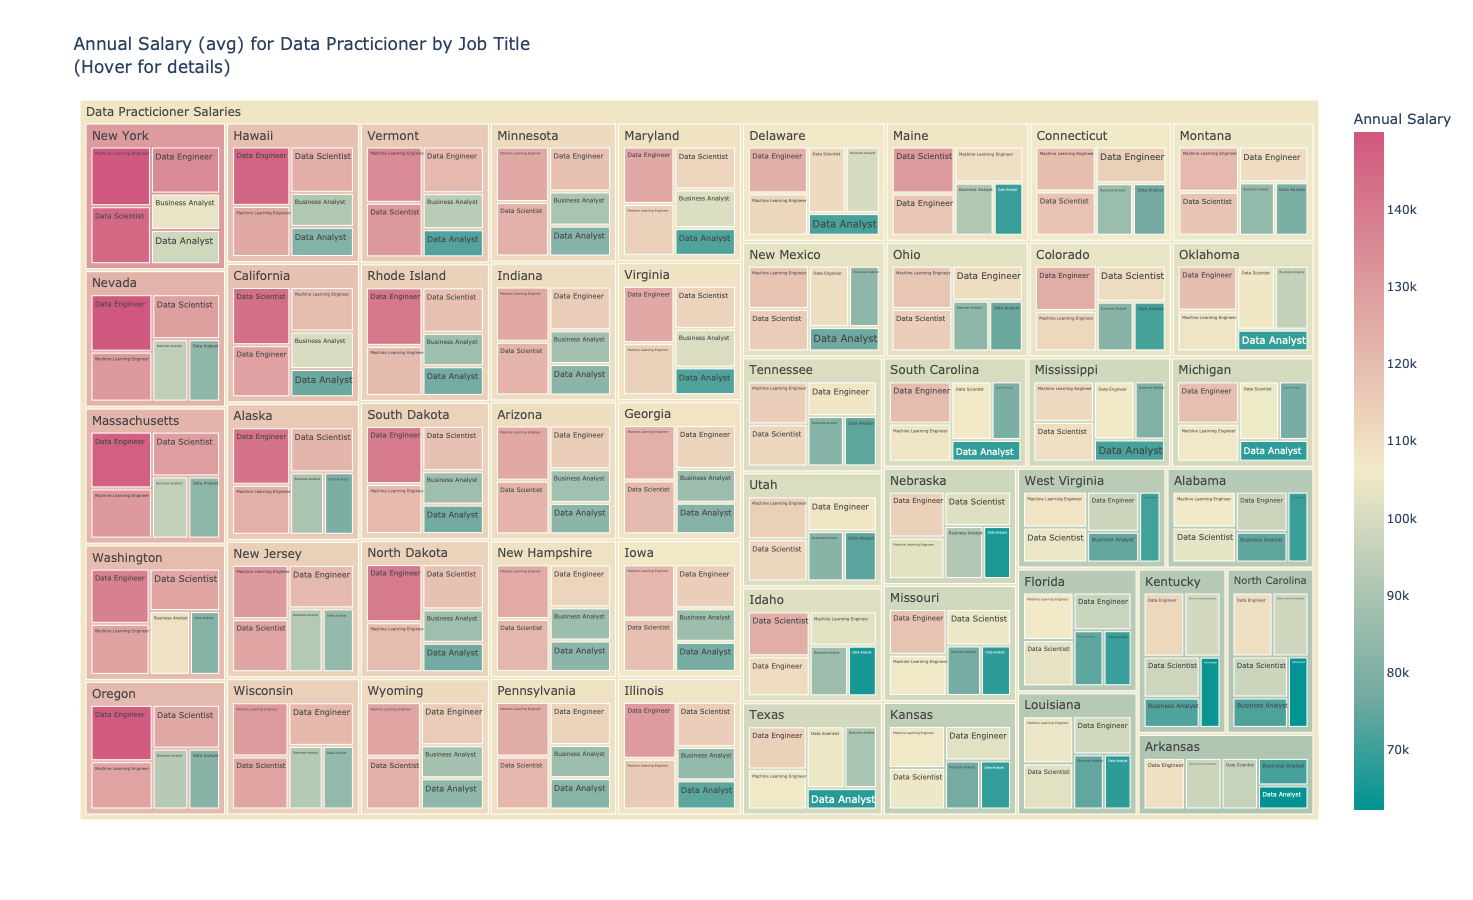

In [33]:
import plotly.graph_objects as go
fig = px.treemap(salary_df, path=[px.Constant('Data Practicioner Salaries'), 'State', 'Job Title'], values='Annual Salary',
                  color='Annual Salary', 
                 height=900,
                 width=1100,
                 title='Annual Salary (avg) for Data Practicioner by Job Title<br>(Hover for details)</br>',
                 hover_name='State',
                 hover_data=['Job Title'],
                 color_continuous_scale='Tealrose',
                 #color_continuous_midpoint=np.average(salary_df['Annual Salary'])              
                )
fig.update_traces(hovertemplate='Job Title=%{label}<br>Annual Salary=%{value}<extra></extra>')
fig.show()